# Template for Exercises Week 03

## Libraries and settings

In [17]:
# Import libraries
import os
import warnings
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnigns
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /workspaces/scientific_programming/Week_03/exercises


## Input & Output in Python

In [18]:
# Read data from the sheet 'cars' in the file 'car_dealer_data.xlsx' in the data folder and store it in a pandas data frame.
df_cars = pd.read_excel('data/car_dealer_data.xlsx', sheet_name='Cars')

# Write Python code to show the dimensions of the data frame.
df_cars.shape

# Write Python code to select only BMW cars.
df_bmw = df_cars[df_cars['Make'] == 'BMW']

# Show the data frame with only BMW cars.
df_bmw

# Store the data frame with only BMW cars in a .csv file named 'bmw_cars.csv' in the data folder.
df_bmw.to_csv('data/bmw_cars.csv', index=False)


## Formatting Strings & Working with Dates in Python

In [19]:
# Read the data from the sheet 'Sales' in the file 'car_dealer_data.xlsx' in the data folder and store it in a pandas data frame.
df_sales = pd.read_excel('data/car_dealer_data.xlsx', sheet_name='Sales')

# Change the format of the column 'SaleDate' of the table 'Sales' in the cars data to 'datetime' with "%Y-%m-%d".
df_sales['SaleDate'] = pd.to_datetime(df_sales['SaleDate'], format='%Y-%m-%d')

# Calculate the date difference between the formatted 'SaleDate' and the today's date and store it in a new column 'DaysSinceSale'.
df_sales['DaysSinceSale'] = (pd.to_datetime('today') - df_sales['SaleDate']).dt.days

# Create a new data frame only with the columns 'CarID' and the 'DaysSinceSale' as sales_info.json in the data folder.
df_sales_info = df_sales[['CarID', 'DaysSinceSale']]
df_sales_info.to_json('data/sales_info.json', orient='records')

# Show the data frame
df_sales_info


,CarID,DaysSinceSale
0,CO22DH3EXT,633
1,C5UBZOD8WB,1998
2,C1PVXTTAN0,1461
3,CV56P1JD32,890
4,C4ZC4AYR1E,750
...,...,...
2495,C0SEQTTH41,1625
2496,CCEMGSDTJF,902
2497,C9XU8VK5LZ,896
2498,C7SQBAS6TR,1939


## Writing and Querying SQLite Databases with Python

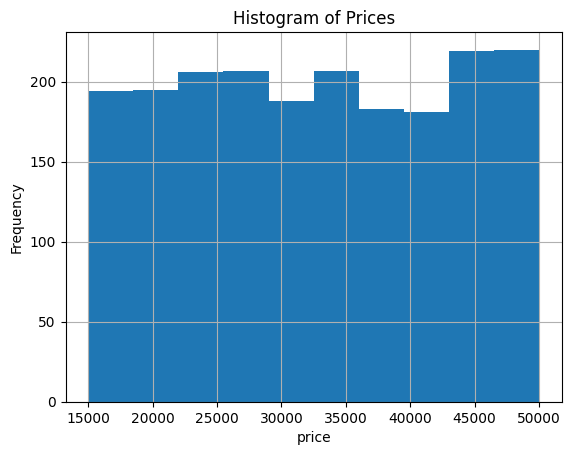

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a connection to the SQLite database 'car_dealer_data.db' in the data folder.
conn = sqlite3.connect('data/car_dealer_data.db')

# Write an SQL statement to select prices >= 10,000 USD and store the result in a pandas data frame.
query = "SELECT * FROM Cars WHERE Price >= 10000"
df_prices = pd.read_sql_query(query, conn)

# Close the connection.
conn.close()

# Show the data frame.
df_prices

# Create a histogram of the selected prices.
df_prices['price'].hist()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

# Store the histogram in a file histogram.png in the data folder.
plt.savefig('data/histogram.png')


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [21]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2025-03-05 12:32:21
Python Version: 3.11.11
-----------------------------------
